In [1]:
import torch
import stim
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import tqdm
plt.style.use(['science'])
from decoders import Nbp
from decoders.tensor_tools import DEM_Matrices, DEM_to_matrices
from decoders.train_tools import optimization_step, training_loop

In [2]:
def plot(loss):
    plt.figure(figsize=(5, 5))
    plt.plot(loss)
    plt.xlabel(r'Minibatch')
    plt.ylabel(r'$\mathcal{L}$')
    plt.show()

def plot_residuals(decoder):
    plt.figure(figsize=(5, 5))
    plt.plot(decoder.residual_weights[0].detach().numpy(), marker='o')
    plt.xlabel(r'i (Layers)')
    plt.ylabel(r'$r_i$')
    plt.show()
    
def plot_rhos(decoder):
    plt.figure(figsize=(5, 5))
    plt.plot(decoder.rhos[0].detach().numpy(), marker='o')
    plt.xlabel(r'i (Layers)')
    plt.ylabel(r'$\rho_i$')
    plt.show()

## Phenomenological Noise (Binary cross entropy)

loss 0.1145868301391602: 100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/phenomenological_binary_cross_entropy.
Training complete.



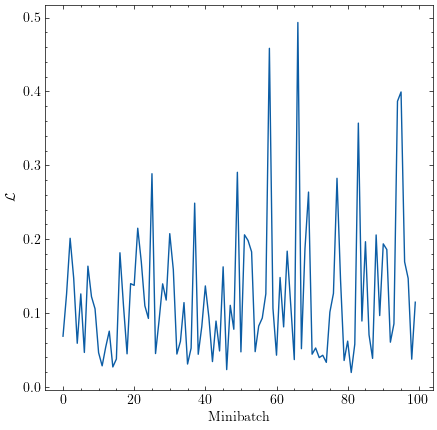

In [3]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 100
CODE = 'repetition'
NOISE_MODEL = 'phenomenological'
LOSS_FUNCTION = 'binary_cross_entropy'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "surface_code:unrotated_memory_z",
                rounds=3,
                distance=3,
                after_clifford_depolarization=0.00,
                after_reset_flip_probability=0.00,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Phenomenological Noise (He=s)

loss 0.0436456650495529: 100%|██████████| 100/100 [02:20<00:00,  1.41s/it]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/phenomenological_He=s.
Training complete.



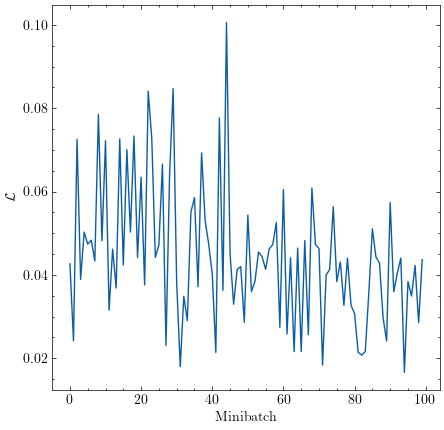

In [4]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 100
CODE = 'repetition'
NOISE_MODEL = 'phenomenological'
LOSS_FUNCTION = 'He=s'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "surface_code:unrotated_memory_z",
                rounds=3,
                distance=3,
                after_clifford_depolarization=0.00,
                after_reset_flip_probability=0.00,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Circuit level noise (Binary cross entropy)

loss 1.9383770227432251: 100%|██████████| 100/100 [06:53<00:00,  4.14s/it]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/circuit_binary_cross_entropy.
Training complete.



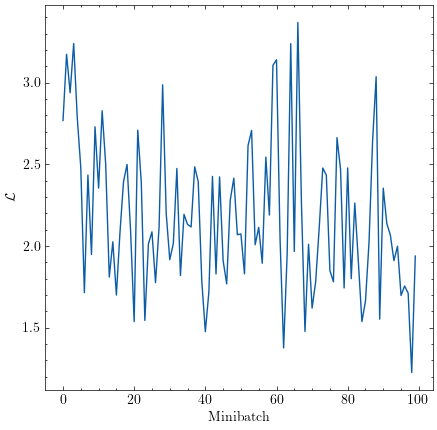

In [5]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 100
CODE = 'repetition'
NOISE_MODEL = 'circuit'
LOSS_FUNCTION = 'binary_cross_entropy'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "surface_code:unrotated_memory_z",
                rounds=3,
                distance=3,
                after_clifford_depolarization=p,
                after_reset_flip_probability=p,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Circuit level noise (He=s)

loss 0.5230213999748230: 100%|██████████| 100/100 [07:07<00:00,  4.28s/it]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/circuit_He=s.
Training complete.



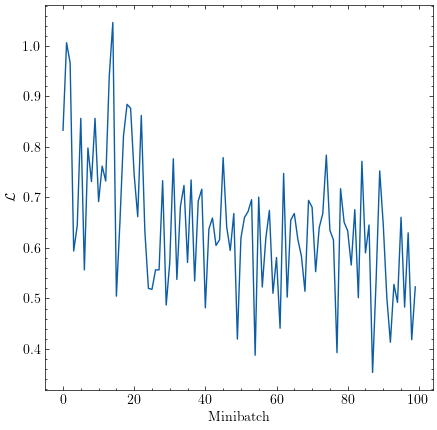

In [6]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 100
CODE = 'repetition'
NOISE_MODEL = 'circuit'
LOSS_FUNCTION = 'He=s'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}'

circuit = stim.Circuit.generated(
                "surface_code:unrotated_memory_z",
                rounds=3,
                distance=3,
                after_clifford_depolarization=p,
                after_reset_flip_probability=p,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

decoder = Nbp(circuit=circuit,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = training_loop(decoder=decoder, 
                     optimizer=optimiser, 
                     mini_batches=MINIBATCHES, 
                     path=WEIGHTS_PATH)

plot(loss)

## Circuit level noise (He=s) with H $\sim$ [H | L]

In [2]:
p = 0.005
LEARNING_RATE = 0.001
LAYERS = 20
BATCH_SIZE = 120
MINIBATCHES = 100
CODE = 'repetition'
NOISE_MODEL = 'circuit'
LOSS_FUNCTION = '[HL]e=s'
WEIGHTS_PATH = f'{CODE}_weights/{NOISE_MODEL}_{LOSS_FUNCTION}_[HL]'

circuit = stim.Circuit.generated(
                "surface_code:unrotated_memory_z",
                rounds=3,
                distance=3,
                after_clifford_depolarization=p,
                after_reset_flip_probability=p,
                before_measure_flip_probability=p,
                before_round_data_depolarization=p)

matrices = DEM_to_matrices(circuit.detector_error_model(decompose_errors=False))

decoder = Nbp(matrices=matrices,
              layers=LAYERS,
              batch_size=BATCH_SIZE,
              loss_function=LOSS_FUNCTION)

parameters = decoder.weights_llr + decoder.weights_de + decoder.marg_weights_llr + decoder.marg_weights_de + decoder.rhos + decoder.residual_weights
optimiser = torch.optim.Adam(parameters, lr=LEARNING_RATE)
loss = torch.zeros(MINIBATCHES)
idx = 0

with tqdm(total=MINIBATCHES) as pbar:
    for _ in range(MINIBATCHES):
        
        dem = circuit.detector_error_model(decompose_errors=False)
        sampler = dem.compile_sampler()
        syndromes, logical_flips, errors = sampler.sample(shots=decoder.batch_size, return_errors=True)
        
        syndromes = torch.from_numpy(syndromes).int()
        syndromes = torch.reshape(syndromes, (len(syndromes), len(syndromes[0]), 1))
        logical_flips = torch.from_numpy(logical_flips).int()
        errors = torch.from_numpy(errors).int()
        loss[idx]= optimization_step(decoder, syndromes, errors, optimiser)
        
        pbar.update(1)
        pbar.set_description(f"loss {loss[idx]:.16f}")
        idx += 1
        
    decoder.save_weights(WEIGHTS_PATH)
print('Training complete.\n')

plot(loss)

loss 0.7067357897758484: 100%|██████████| 100/100 [07:27<00:00,  4.48s/it]


Weigths saved as weights_de.pt, weights_llr.pt, marg_weights_de.pt, marg_weights_llr.pt, residual_weights.pt, rhos.pt at repetition_weights/circuit_[HL]e=s_[HL].
Training complete.



NameError: name 'plot' is not defined

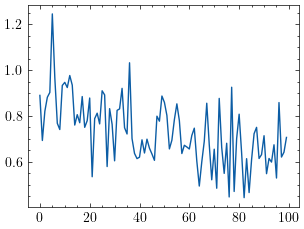

In [3]:
plt.plot(loss)